## Regularization Techniques

### Import Libraries

In [1]:
# Import Libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge, Lasso, ElasticNet
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error

plt.style.use('ggplot')

### Load Data

In [40]:
# Read in data
df = pd.read_csv('../Data/advertising_and_sales_clean.csv')

# Preview Features
df.head()

,tv,radio,social_media,influencer,sales
0,16000.0,6566.23,2907.98,Mega,54732.76
1,13000.0,9237.76,2409.57,Mega,46677.90
2,41000.0,15886.45,2913.41,Mega,150177.83
3,83000.0,30020.03,6922.30,Mega,298246.34
4,15000.0,8437.41,1406.00,Micro,56594.18


### EDA and Data Preprocessing

In [3]:
# Check data types and look for null values
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4546 entries, 0 to 4545
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   tv            4546 non-null   float64
 1   radio         4546 non-null   float64
 2   social_media  4546 non-null   float64
 3   influencer    4546 non-null   object 
 4   sales         4546 non-null   float64
dtypes: float64(4), object(1)
memory usage: 177.7+ KB


In [4]:
# Display describitive statistics
df.describe()

,tv,radio,social_media,sales
count,4546.000000,4546.000000,4546.000000,4546.000000
mean,54062.912451,18157.533110,3323.472829,192413.332112
std,26104.941838,9663.259642,2211.253915,93019.873216
min,10000.000000,0.680000,0.030000,31199.410000
25%,32000.000000,10555.355000,1530.822500,112434.610000
50%,53000.000000,17859.515000,3055.565000,188963.680000
75%,77000.000000,25640.605000,4804.922500,272324.240000
max,100000.000000,48871.160000,13981.660000,364079.750000


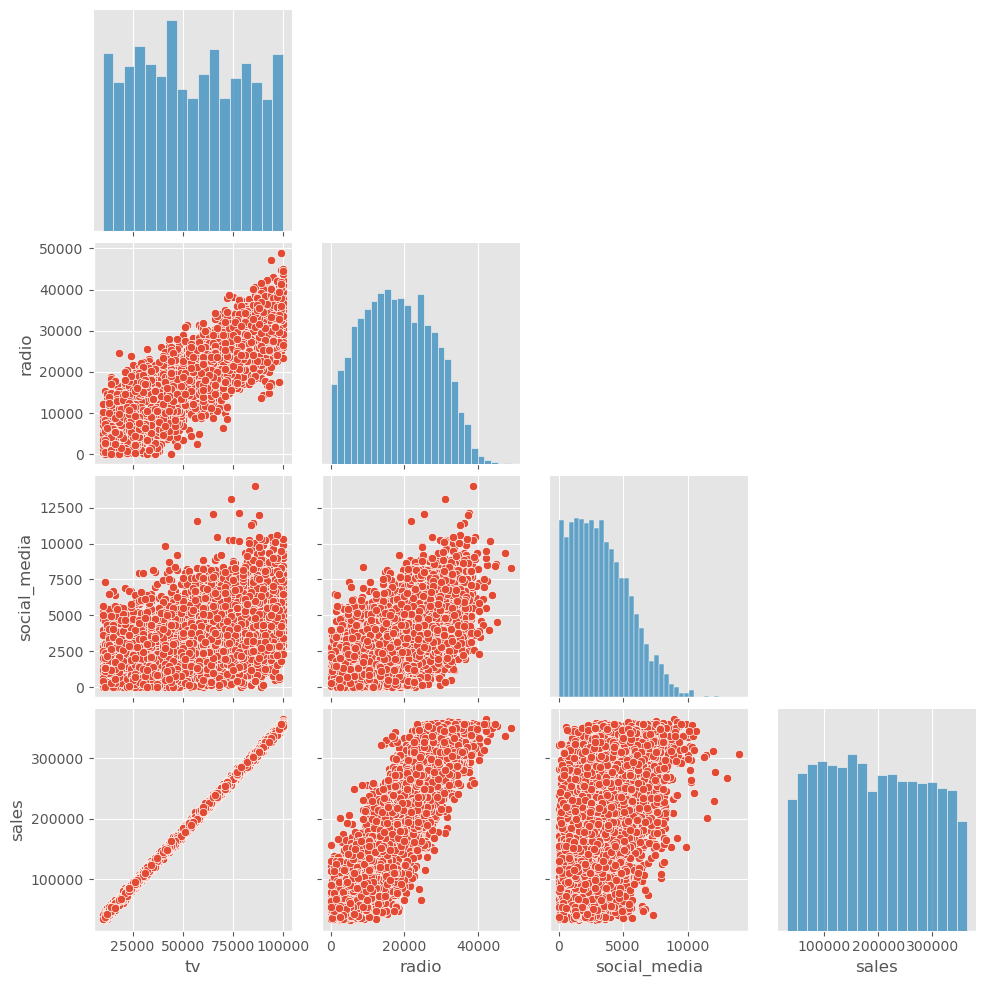

In [5]:
# Plot pairplot to visualize ditrubutions
sns.pairplot(df, corner=True)
plt.show()

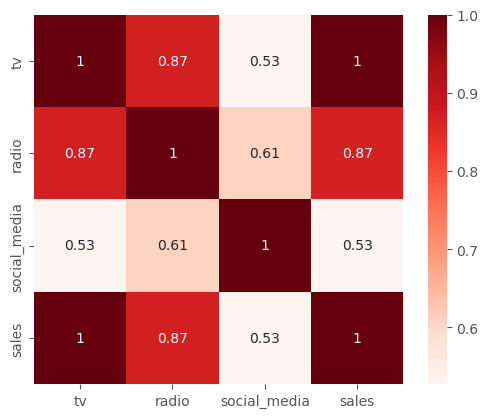

In [6]:
# Plot correlation matrix to find the relationship between our target and feature variables
sns.heatmap(df.corr(), annot=True, square=True, cmap='Reds')
plt.show()

In [7]:
# Select Target and Features
X = df.iloc[: , 1: 3].values
y = df["sales"].values

# Preview shape of features
X.shape

(4546, 2)

In [8]:
# Preview shape of target variable
y.shape

(4546,)

In [9]:
# Split data into training and testing
X_train, X_test, y_train, y_test = train_test_split(X,
                                                    y,
                                                    test_size=0.3,
                                                    random_state=42)

In [10]:
# Scale the data
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

### Linear Regression Model

In [11]:
# Instantiate linear model
lr = LinearRegression()

# Fit model
lr.fit(X_train, y_train)

LinearRegression()

In [12]:
# Compute R-Squared for the Linear Regression Model
print("R-Squared {}".format(lr.score(X_train, y_train)))



R-Squared 0.7516559107211117


In [13]:
# Make prediction
y_pred = lr.predict(X_test)

# Compute mean_squared_error
mse = mean_squared_error(y_test, y_pred)

print("RMSE: ", np.sqrt(mse))


RMSE:  45881.37059678531


In [14]:
# Display intercept and slope
print(f"Intercept: {lr.intercept_}")
print(f"Coefficient: {lr.coef_}")

Intercept: 192557.20164047755
Coefficient: [80146.97477187   299.53249947]


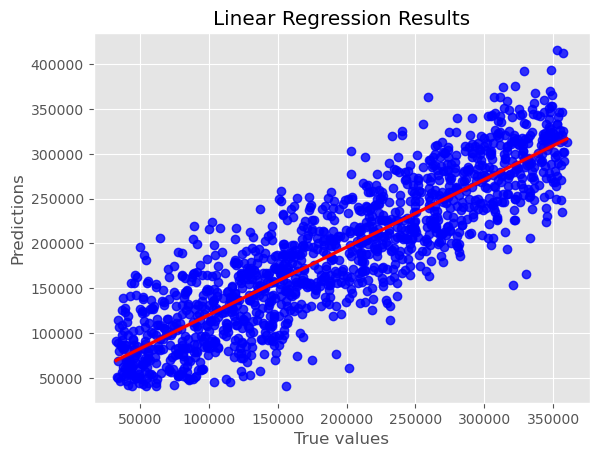

In [15]:
# Plot Results
def plot_results(x, y, model_name):
    sns.regplot(x=y_test, y=y_pred,scatter_kws={"color": "blue"}, line_kws={"color": "red"})
    plt.xlabel("True values")
    plt.ylabel("Predictions")
    plt.title(f"{model_name} Results")
    plt.savefig(f'../Images/{model_name} Results.png')
    plt.show()
plot_results(y_test, y_pred, "Linear Regression")

### Lasso Regularization

In [16]:
# Instantiate and Fit Lasso regression model 
lasso = Lasso(alpha = 10, random_state=42)
lasso.fit(X_train,y_train)


Lasso(alpha=10, random_state=42)

In [17]:
# Compute R-Squared for the Lasso Model
print("R-Squared {}".format(lasso.score(X_train, y_train)))

R-Squared 0.7516558986112105


In [18]:
# Make prediction
y_pred = lasso.predict(X_test)

# Compute mean_squared_error
mse = mean_squared_error(y_test, y_pred)

print("RMSE: ", np.sqrt(mse))

RMSE:  45881.400342063855


In [19]:
# Display intercept and slope
print(f"Intercept: {lasso.intercept_}")
print(f"Coefficient: {lasso.coef_}")

Intercept: 192557.20164047755
Coefficient: [80144.4501877    291.08404711]


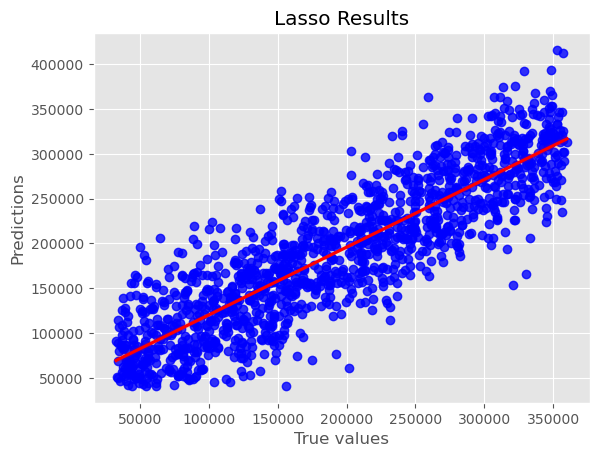

In [20]:
# Plot Results
plot_results(y_test, y_pred, "Lasso")

### Ridge Regularization

In [21]:
ridge = Ridge(alpha = 10, random_state=42)
ridge.fit(X_train,y_train)

Ridge(alpha=10, random_state=42)

In [22]:
# Compute R-Squared for the Ridge Model
print("R-Squared: {:.3f}".format(ridge.score(X_train, y_train)))

R-Squared: 0.752


In [23]:
# Make prediction
y_pred = ridge.predict(X_test)

# Compute mean_squared_error
mse = mean_squared_error(y_test, y_pred)

print("RMSE: ", np.sqrt(mse))

RMSE:  45887.96626202806


In [24]:
# Display intercept and slope
print(f"Intercept: {ridge.intercept_}")
print(f"Coefficient: {ridge.coef_}")

Intercept: 192557.20164047755
Coefficient: [79745.93708744   544.28991626]


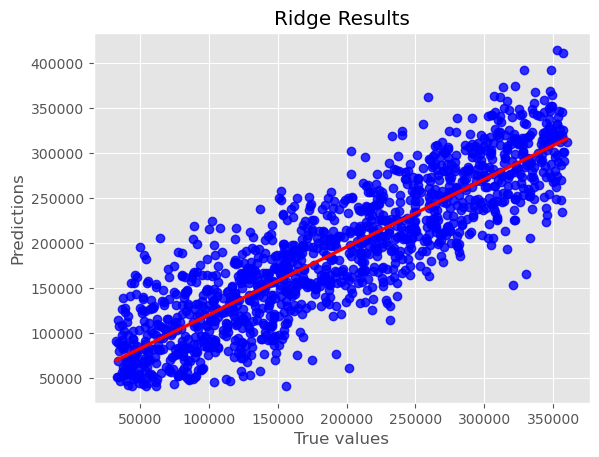

In [25]:
# Plot Results
plot_results(y_test, y_pred, "Ridge")

### ElasticNet

In [26]:
# Instantiate and Fit Model
elastic = ElasticNet(l1_ratio=0.5, alpha=1, random_state=42)
elastic.fit(X_train, y_train)

# Compute R-Squared for the ElasticNet Model
print("R-Squared: {:.3f}".format(elastic.score(X_train, y_train)))

R-Squared: 0.672


In [27]:
# Make prediction
y_pred = elastic.predict(X_test)

# Compute mean_squared_error
mse = mean_squared_error(y_test, y_pred)

print("RMSE: ", np.sqrt(mse))

RMSE:  53566.47742727666


In [28]:
# Display intercept and slope
print(f"Intercept: {elastic.intercept_}")
print(f"Coefficient: {elastic.coef_}")

Intercept: 192557.20164047764
Coefficient: [48091.55299925 13333.00672552]


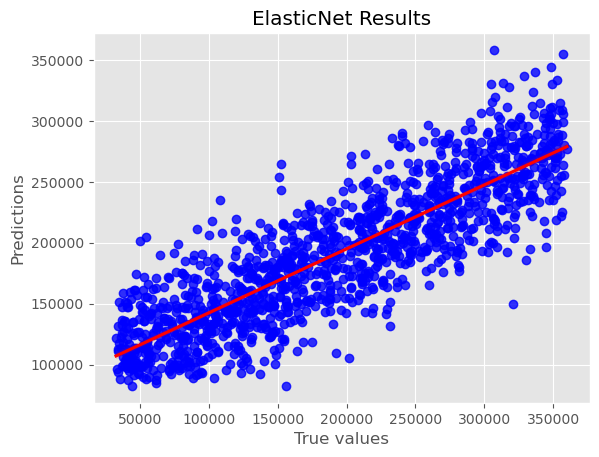

In [29]:
# Plot Results
plot_results(y_test, y_pred, "ElasticNet")

### Determine optimal models

ElasticNetCV Model Performance

R-Squared: 0.752
l1_ratio: 1.0
alpha: 10.0
RMSE:  45881.400342063855
Intercept: 192557.20164047755
Coefficient: [80144.4501877    291.08404711]



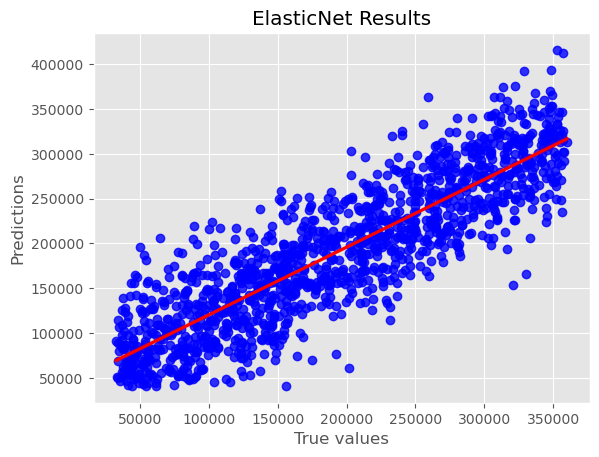

In [30]:
# Use ElasticNetCV to choose the Elastic net model with best model selection 
from sklearn.linear_model import ElasticNetCV

elastic_cv = ElasticNetCV(fit_intercept=True, alphas=[0.0001, 0.001,0.01, 0.1, 1, 10],
                       l1_ratio=[0.1, 0.5, 0.9, .95, 1], random_state=42)

elastic_cv.fit(X_train, y_train)   

print("ElasticNetCV Model Performance\n")

# Compute R-Squared for the ElasticNetCV Model
print("R-Squared: {:.3f}".format(elastic_cv.score(X_train, y_train)))

# Display best parameters
print(f"l1_ratio: {elastic_cv.l1_ratio_}")
print(f"alpha: {elastic_cv.alpha_}")             

# Make prediction
y_pred = elastic_cv.predict(X_test)

# Compute mean_squared_error
mse = mean_squared_error(y_test, y_pred)

# Print RMSE
print("RMSE: ", np.sqrt(mse))

# Display intercept and slope
print(f"Intercept: {elastic_cv.intercept_}")
print(f"Coefficient: {elastic_cv.coef_}\n")

plot_results(y_test, y_pred, "ElasticNet")

LassoCV Model Performance

alpha: 10.0
R-Squared: 0.7516558986112105
RMSE:  45881.400342063855
Intercept: 192557.20164047755
Coefficient: [80144.4501877    291.08404711]



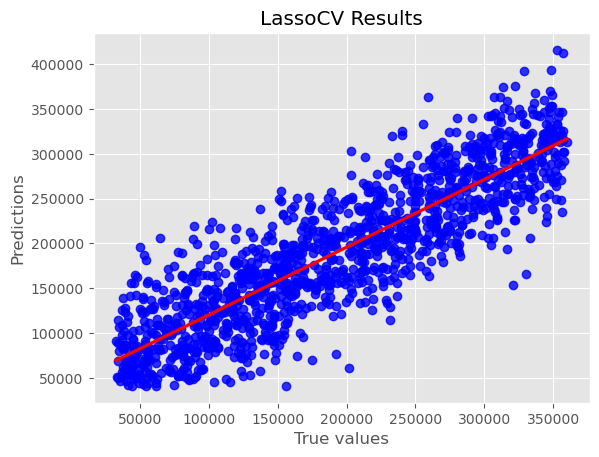

In [31]:
# Use LassoCV to choose the Lasso regularization model with best model selection 
from sklearn.linear_model import LassoCV

lasso_cv = LassoCV(alphas = [0.0001, 0.001,0.01, 0.1, 1, 10], random_state=42)

lasso_cv.fit(X_train, y_train)   

print("LassoCV Model Performance\n")

# Display best parameters
print(f"alpha: {lasso_cv.alpha_}")             

# Compute R-Squared for the LassoCV Model
print("R-Squared: {}".format(lasso_cv.score(X_train, y_train)))

# Make prediction
y_pred = lasso_cv.predict(X_test)

# Compute mean_squared_error
mse = mean_squared_error(y_test, y_pred)

print("RMSE: ", np.sqrt(mse))
# Display intercept and slope
print(f"Intercept: {lasso_cv.intercept_}")
print(f"Coefficient: {lasso_cv.coef_}\n")

plot_results(y_test, y_pred, "LassoCV")

RidgeCV Model Performance

alpha: 1.0
R-Squared: 0.7516557926813602
RMSE:  45881.928012445605
Intercept: 192557.20164047755
Coefficient: [80106.62055451   324.23131824]



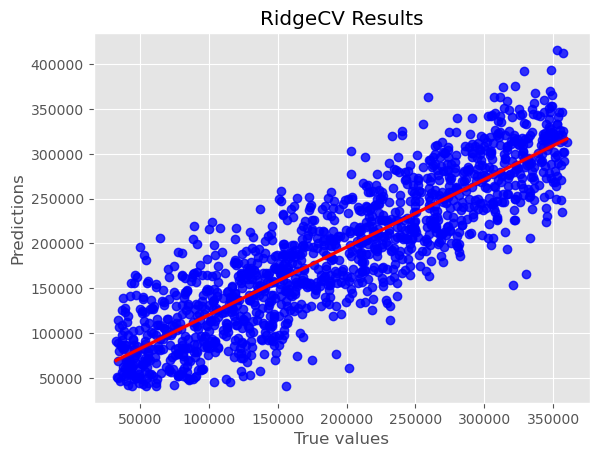

In [32]:
# Use RidgeCV to choose the Ridge regularization model with best model selection 
from sklearn.linear_model import RidgeCV

ridge_cv = RidgeCV(alphas = [0.0001, 0.001,0.01, 0.1, 1, 10])

ridge_cv.fit(X_train, y_train)   

print("RidgeCV Model Performance\n")

# Display best parameters
print(f"alpha: {ridge_cv.alpha_}")             

# Compute R-Squared for the RidgeCV Model
print("R-Squared: {}".format(ridge_cv.score(X_train, y_train)))

# Make prediction
y_pred = ridge_cv.predict(X_test)

# Compute mean_squared_error
mse = mean_squared_error(y_test, y_pred)

print("RMSE: ", np.sqrt(mse))
# Display intercept and slope
print(f"Intercept: {ridge_cv.intercept_}")
print(f"Coefficient: {ridge_cv.coef_}\n")

plot_results(y_test, y_pred, "RidgeCV")

### Compare models using optimal parameters

In [33]:
models = {
    'LinearRegression':LinearRegression(),
    'Lasso':Lasso(alpha=10.0),
    'Ridge':Ridge(alpha=1.0),
    'ElasticNet':ElasticNet(l1_ratio=1, alpha=10)

}

In [34]:
# Store model result
model_results = []
model_names = []

# Train the models
for name,model in models.items():
    history = model.fit(X_train, y_train)
    predicted = history.predict(X_test)
    score = np.sqrt(mean_squared_error(y_test, predicted))
    model_results.append(score)
    model_names.append(name)
    
    # Create dataframe and print results
    df_results = pd.DataFrame([model_names, model_results])
    df_results = df_results.transpose()
    df_results = df_results.rename(columns={0:'Model', 1:'RMSE'}).sort_values(by='RMSE', ascending=False)
    
print(df_results)

              Model          RMSE
2             Ridge  45881.928012
1             Lasso  45881.400342
3        ElasticNet  45881.400342
0  LinearRegression  45881.370597
